=== 장기 수익률 기준 이재명 테마주 vs KODEX200 상관계수 ===
KODEX200    1.000000
오리엔트바이오     0.361960
코나아이        0.303731
형지I&C       0.239482
상지건설       -0.194514
Name: KODEX200, dtype: float64


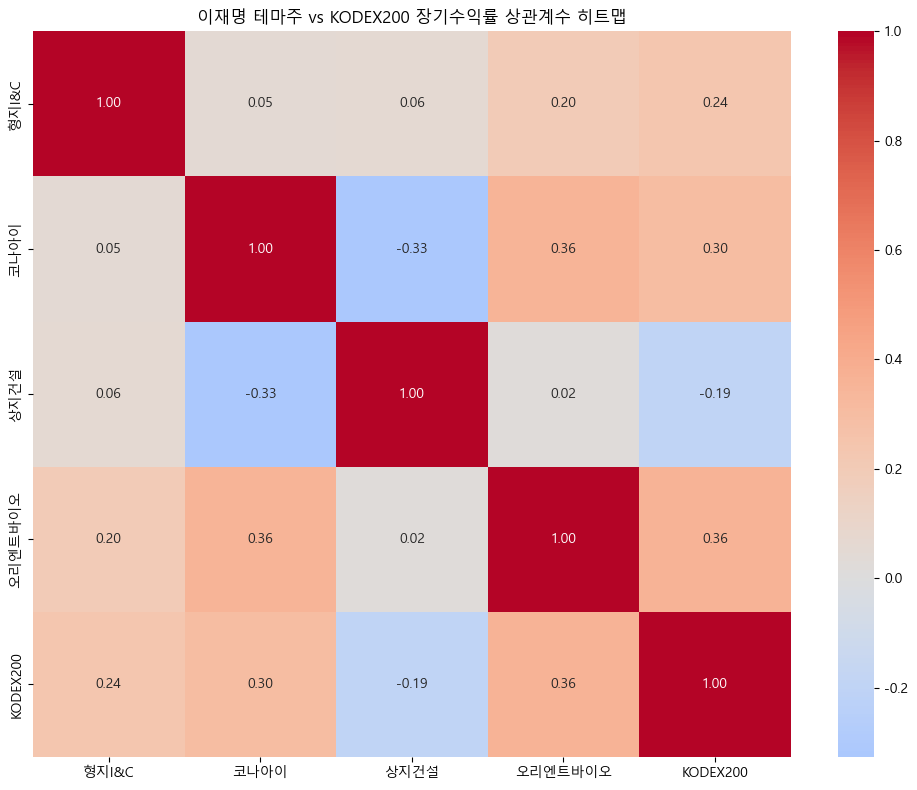

In [1]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 날짜 설정
start_date = '2022-01-28' #경선확정일 - 40
end_date = '2022-04-18' #경선확정일 + 40

label_dict = {
    'thema1': '형지I&C',
    'thema2': '코나아이',
    'thema3': '상지건설',
    'thema4': '오리엔트바이오',
    'thema5': '포바이포'
}



thema1 = fdr.DataReader('011080', start=start_date, end=end_date) #테마주1
thema2 = fdr.DataReader('052400', start=start_date, end=end_date)
thema3 = fdr.DataReader('042940', start=start_date, end=end_date)
thema4 = fdr.DataReader('002630', start=start_date, end=end_date)

thema= pd.DataFrame()

thema['thema1'] = thema1['Close']
thema['thema2'] = thema2['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
#(1)에 추가했을 경우 이 부분도 추가해주세요

# 일간 기준 리샘플링 및 로그수익률 계산
thema = thema.resample('d').last()
thema_returns = np.log(thema / thema.shift(1)).dropna()
thema_returns_named = thema_returns.rename(columns=label_dict)

# KODEX200 수집 및 수익률 계산
kodex = fdr.DataReader('069500', start=start_date, end=end_date)['Close']
kodex = kodex.resample('d').last()
kodex_return = np.log(kodex / kodex.shift(1)).dropna()

# KODEX200 수익률 추가
thema_returns_named['KODEX200'] = kodex_return

# 상관관계 계산
correlation_matrix = thema_returns_named.corr()

# 출력
print("=== 장기 수익률 기준 이재명 테마주 vs KODEX200 상관계수 ===")
print(correlation_matrix['KODEX200'].sort_values(ascending=False))

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("이재명 테마주 vs KODEX200 장기수익률 상관계수 히트맵")
plt.tight_layout()
plt.show()
